In [1]:
from src.utils.miscellaneous import ResultSaver
import uncertainty_toolbox as uct
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

rs = ResultSaver('/home/g15farris/bin/forks/bayesaenet/src/logs/predict/runs/2024-05-31_12-46-33', 
                 'LRT_001_val.parquet')

In [23]:
!ls

data
fo_correlation_FO_001_val.png
fo_uncertanty_analysis_FO_001_val.png
LRT_001_val.pkl
LRT_correlation_LRT_001_val.png
LRT_uncertanty_analysis_LRT_001_val.png
notebooks
prediction.ipynb
pred.py
RAD_correlation_RAD_001_val.png
RAD_uncertanty_analysis_RAD_001_val.png
scripts
src
train
train.log


In [22]:
df = rs.load()
df.to_pickle("LRT_001_val.pkl")


In [12]:
plt.rcParams.update({
    "figure.dpi" : 200,
    "font.family": "sans-serif",
    "font.sans-serif": "Arial",
    "font.size" : 9,
    'mathtext.default': 'regular'
})

cm = 1/2.54  # centimeters in inches

In [13]:
y_true = rs.load()['true'].to_numpy()
y_pred = rs.load()['preds'].to_numpy()
y_std = rs.load()['stds'].to_numpy()
name = 'LRT_001_val'

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

R2 score: 0.410


<Axes: title={'center': 'Residuals vs. Predictive Standard Deviations'}, xlabel='Standard Deviations (Scaled)', ylabel='Residuals (Absolute Value)'>

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

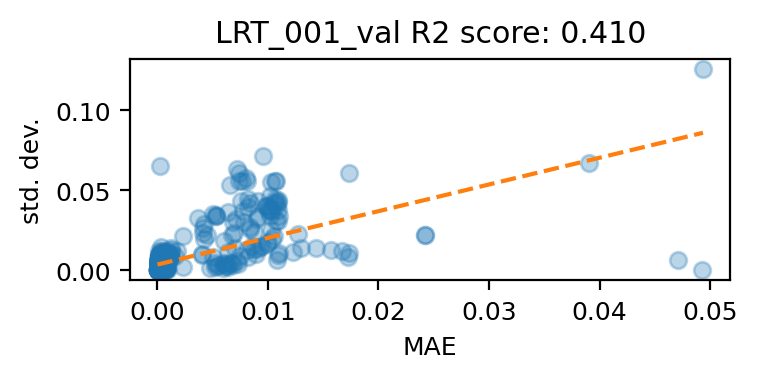

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

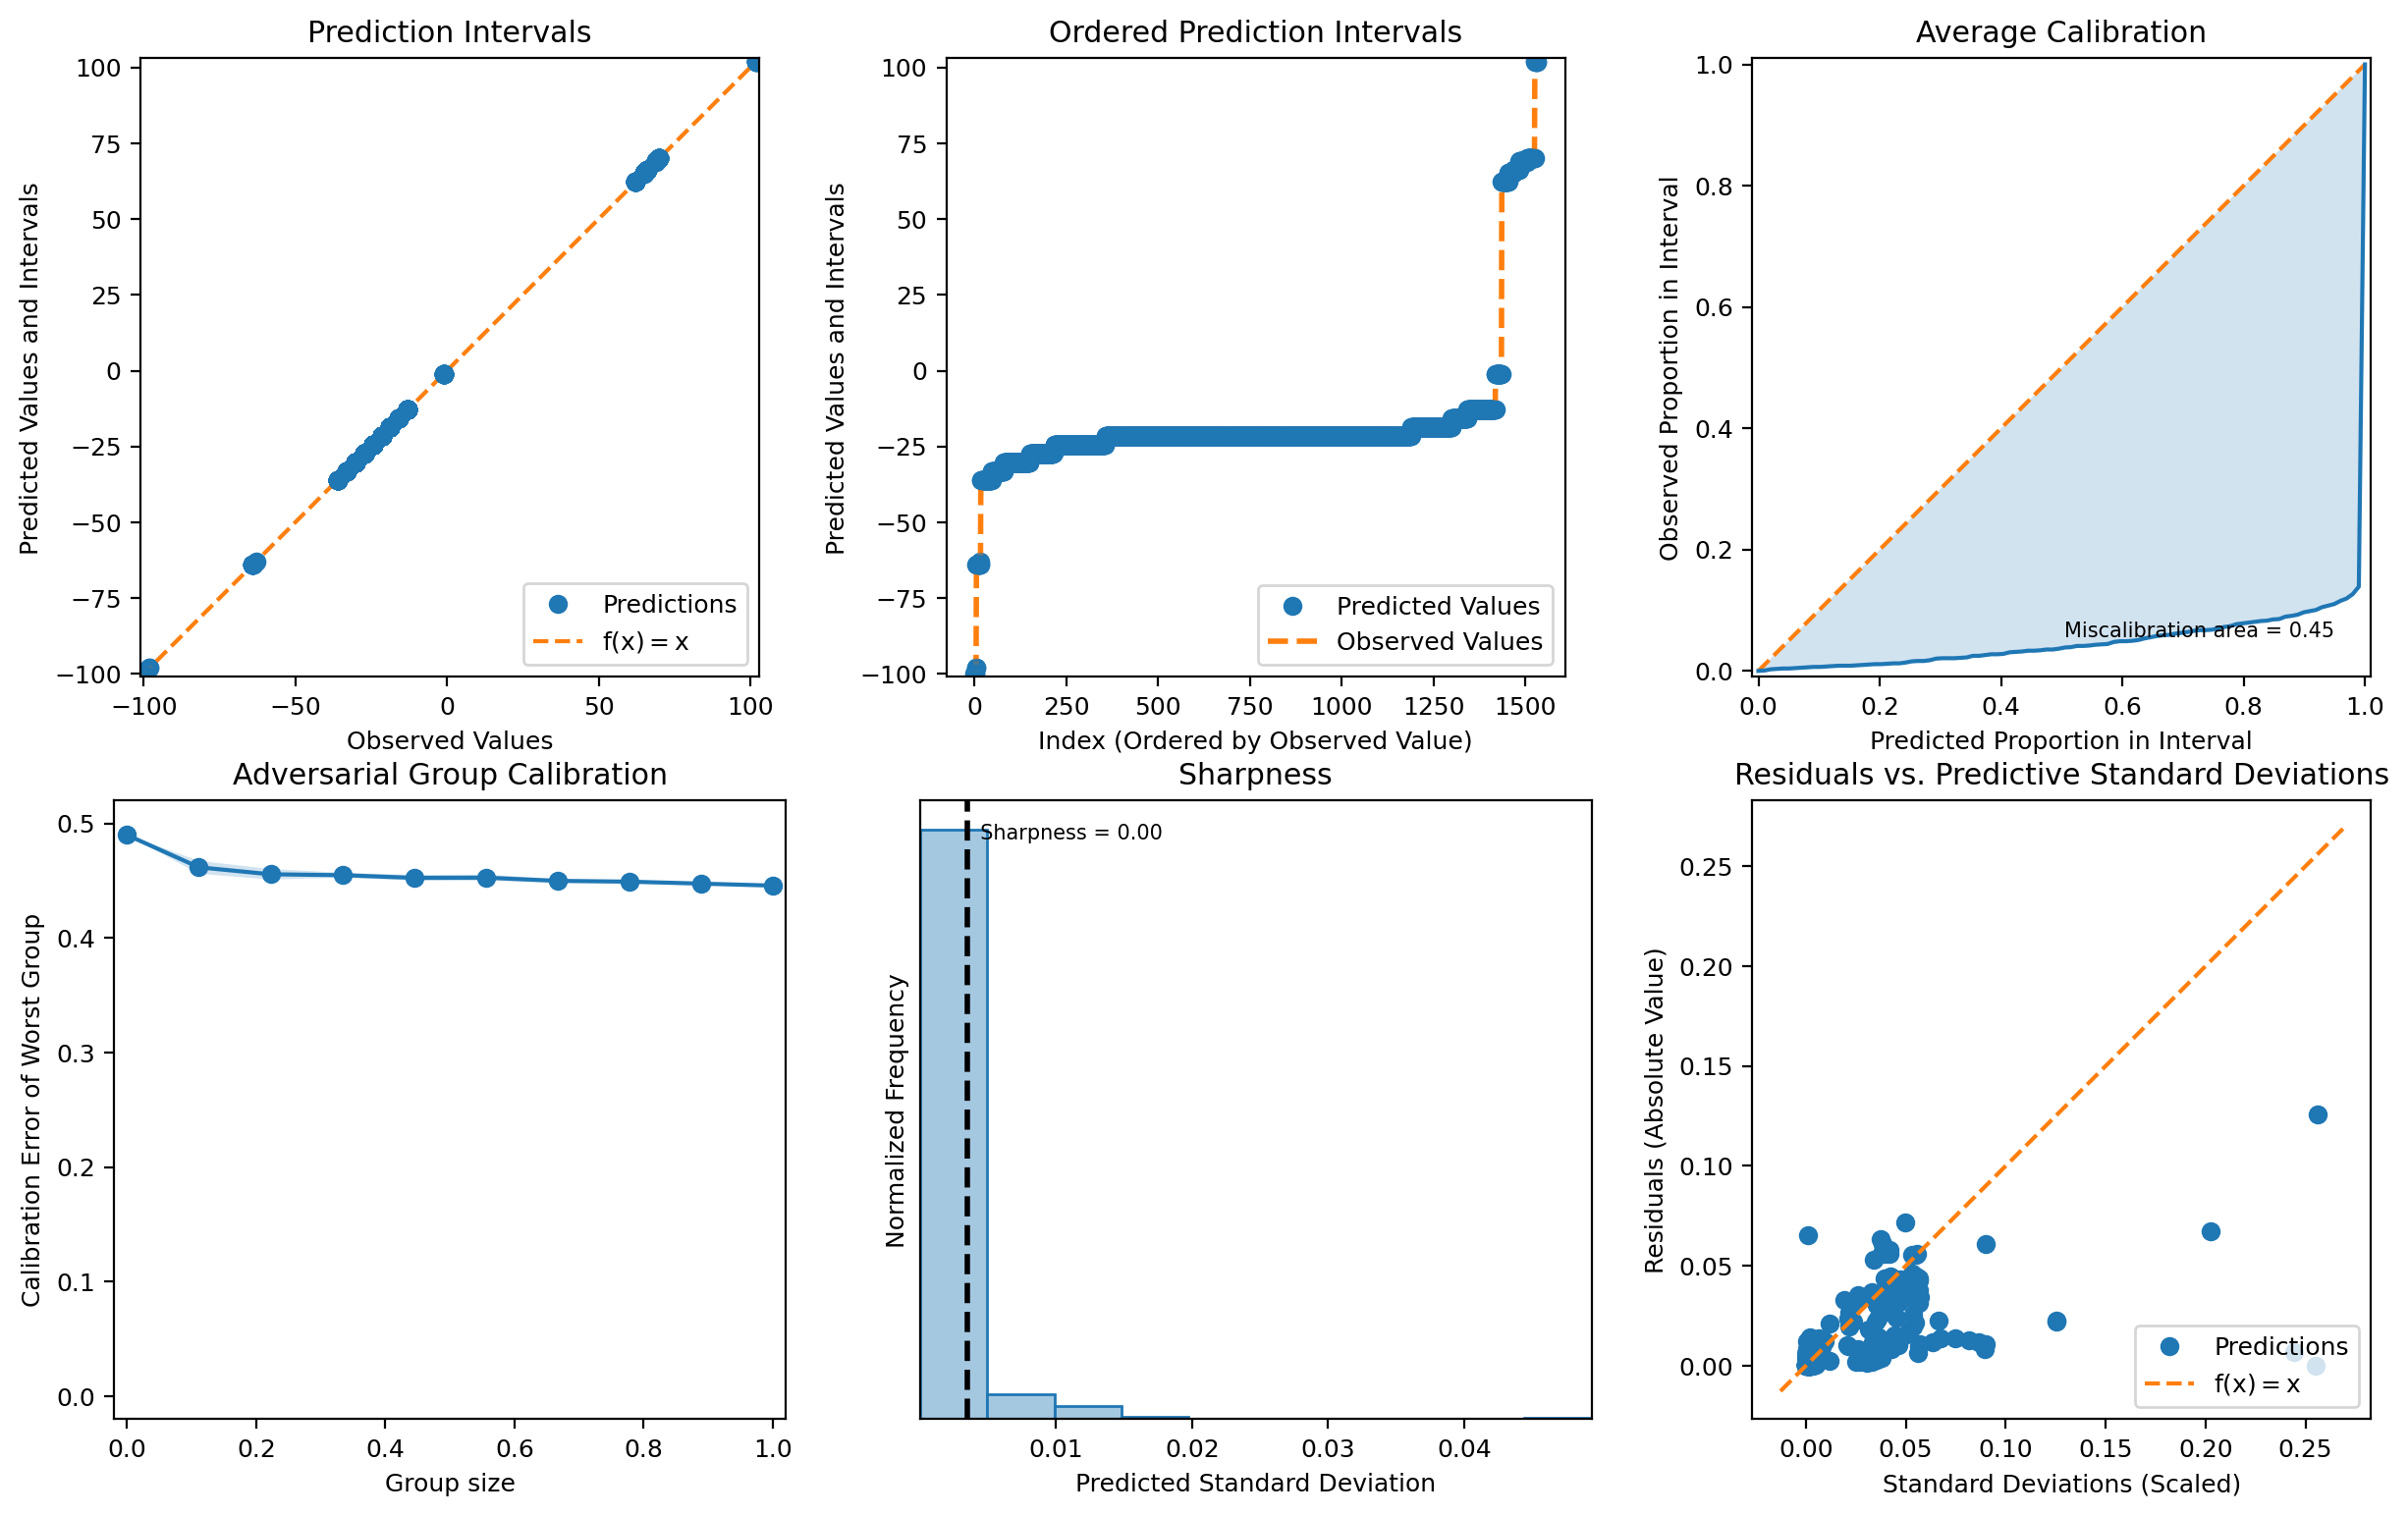

In [17]:
regr = LinearRegression()

y_model = abs(y_pred-y_true).reshape(-1,1)
x_model = y_std.reshape(-1,1)

regr.fit(x_model, y_model)
y_model_pred = regr.predict(x_model)
x_modelito = np.linspace(0, max(x_model), 100).reshape(-1,1)


fig, ax = plt.subplots(1, figsize=(10*cm, 5*cm), sharey=True)

ax.scatter(x_model, y_model, alpha=0.3)
ax.plot(x_modelito, regr.predict(x_modelito), '--', color='tab:orange', label='f(x)=x')


print('R2 score: {:.3f}'.format(r2_score(y_model, y_model_pred)))
#ax[1].scatter(x_model, y_model, alpha=0.3, label='Predictions')

#ax[1].plot(x_modelito, regr.predict(x_modelito), '--', color='tab:orange', label='f(x)=x')

#ax[1].set_xlim(-0.1,1)
ax.set_title('{} R2 score: {:.3f}'.format(name, r2_score(y_model, y_model_pred)))
#ax[1].set_xlabel('MAE')
ax.set_xlabel('MAE')
ax.set_ylabel('std. dev.')
#ax[1].legend()
fig.tight_layout()
#fig.savefig(f'predict/fo_correlation_{name}_5perc.png'

y_std = y_std - min(y_std)+0.00001
fig, ax = plt.subplots(2, 3, figsize=(15, 9))
ax = ax.flat
uct.plot_intervals(y_pred, y_std, y_true, ax=ax[0])
uct.plot_intervals_ordered(y_pred, y_std, y_true, ax=ax[1])
uct.plot_calibration(y_pred, y_std, y_true, ax=ax[2])
uct.plot_adversarial_group_calibration(y_pred, y_std, y_true, ax=ax[3])
uct.plot_sharpness(y_std, ax=ax[4])
uct.plot_residuals_vs_stds(y_pred, y_std, y_true, ax=ax[5])